# Data Privacy and Security HW1

In [5]:
! pip install pandas numpy IPython matplotlib seaborn ucimlrepo

In [73]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np

adult = fetch_ucirepo(id=2) 

X = adult.data.features 
y = adult.data.targets 

data = pd.concat([X, y], axis=1)
print(data["income"].value_counts())
data["income_cleaned"] = data["income"].str.replace('.', '')
print(data["income_cleaned"].value_counts())

data.to_csv('adult.csv', index=False)




income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64
income_cleaned
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [74]:
from IPython.display import display, HTML

data["income_cleaned"] = data["income"].str.replace('.', '')
# print(data["income_cleaned"].value_counts())
# print(data.keys())
# print(data.head())

display(HTML("<h3 >Preview</h3>"))
display(data.head())

html_table = data.head().to_html(index=False)
display(HTML(html_table))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_cleaned
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<=50K


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_cleaned
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<=50K


In [75]:
data.isnull().sum()
data[data == "?"] = np.nan
for col in ["workclass", "occupation", "native-country"]:
    data[col] = data[col].fillna(data[col].mode()[0])
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
income_cleaned    0
dtype: int64

Numeric Features

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
                      age         fnlwgt  education-num  capital-gain  \
income_cleaned                                                          
<=50K           36.872184  190039.565523       9.598493    147.010308   
>50K            44.275178  188470.574570      11.602807   4042.239497   

                capital-loss  hours-per-week  
income_cleaned                                
<=50K              54.151931       38.840048  
>50K              193.528964       45.452896  


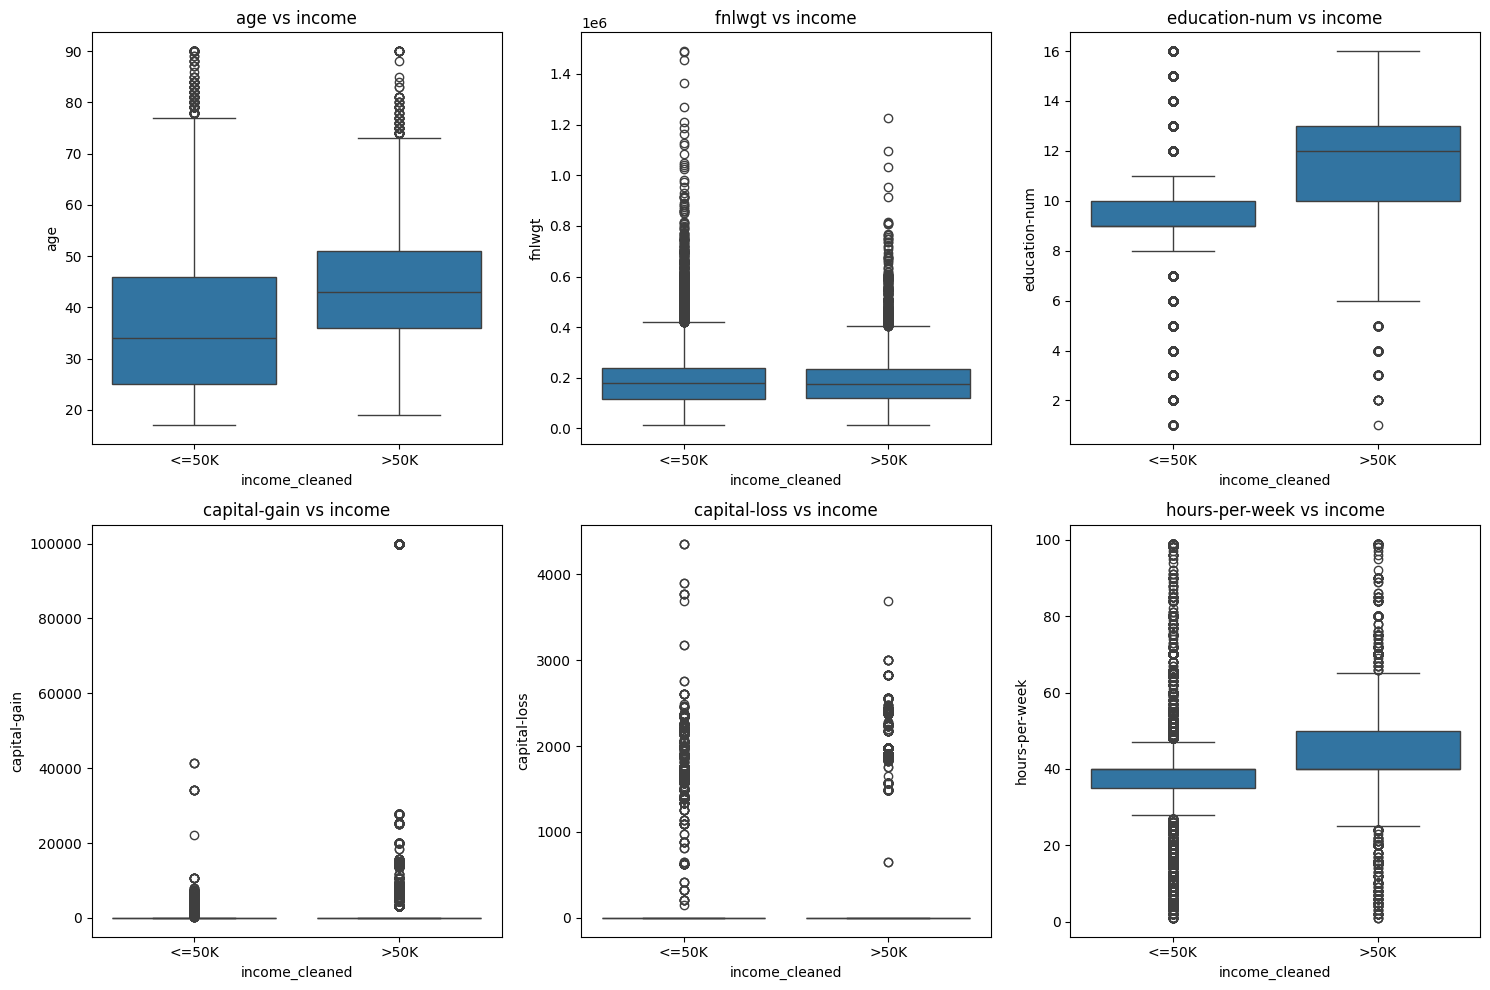

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = data.select_dtypes(include=np.number).columns
print(num_cols)
print(data.groupby("income_cleaned")[num_cols].mean())

plt.figure(figsize=(15, 10))
for i, cols in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x="income_cleaned", y=cols, data=data)
    plt.title(f"{cols} vs income")
plt.tight_layout()
plt.show()


Categoric Features

/tmp/ipykernel_1462997/1203415000.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y='High Income', data=top_categories.reset_index(), palette=color)
/tmp/ipykernel_1462997/1203415000.py:27: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.barplot(x=top_categories.index, y='High Income', data=top_categories.reset_index(), palette=color)
/tmp/ipykernel_1462997/1203415000.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y='High Income', data=top_categories.reset_index(), palette=color)
/tmp/ipykernel_1462997/1203415000.py:27: FutureWarning: 

Passing `palette` without assigning `hue` i

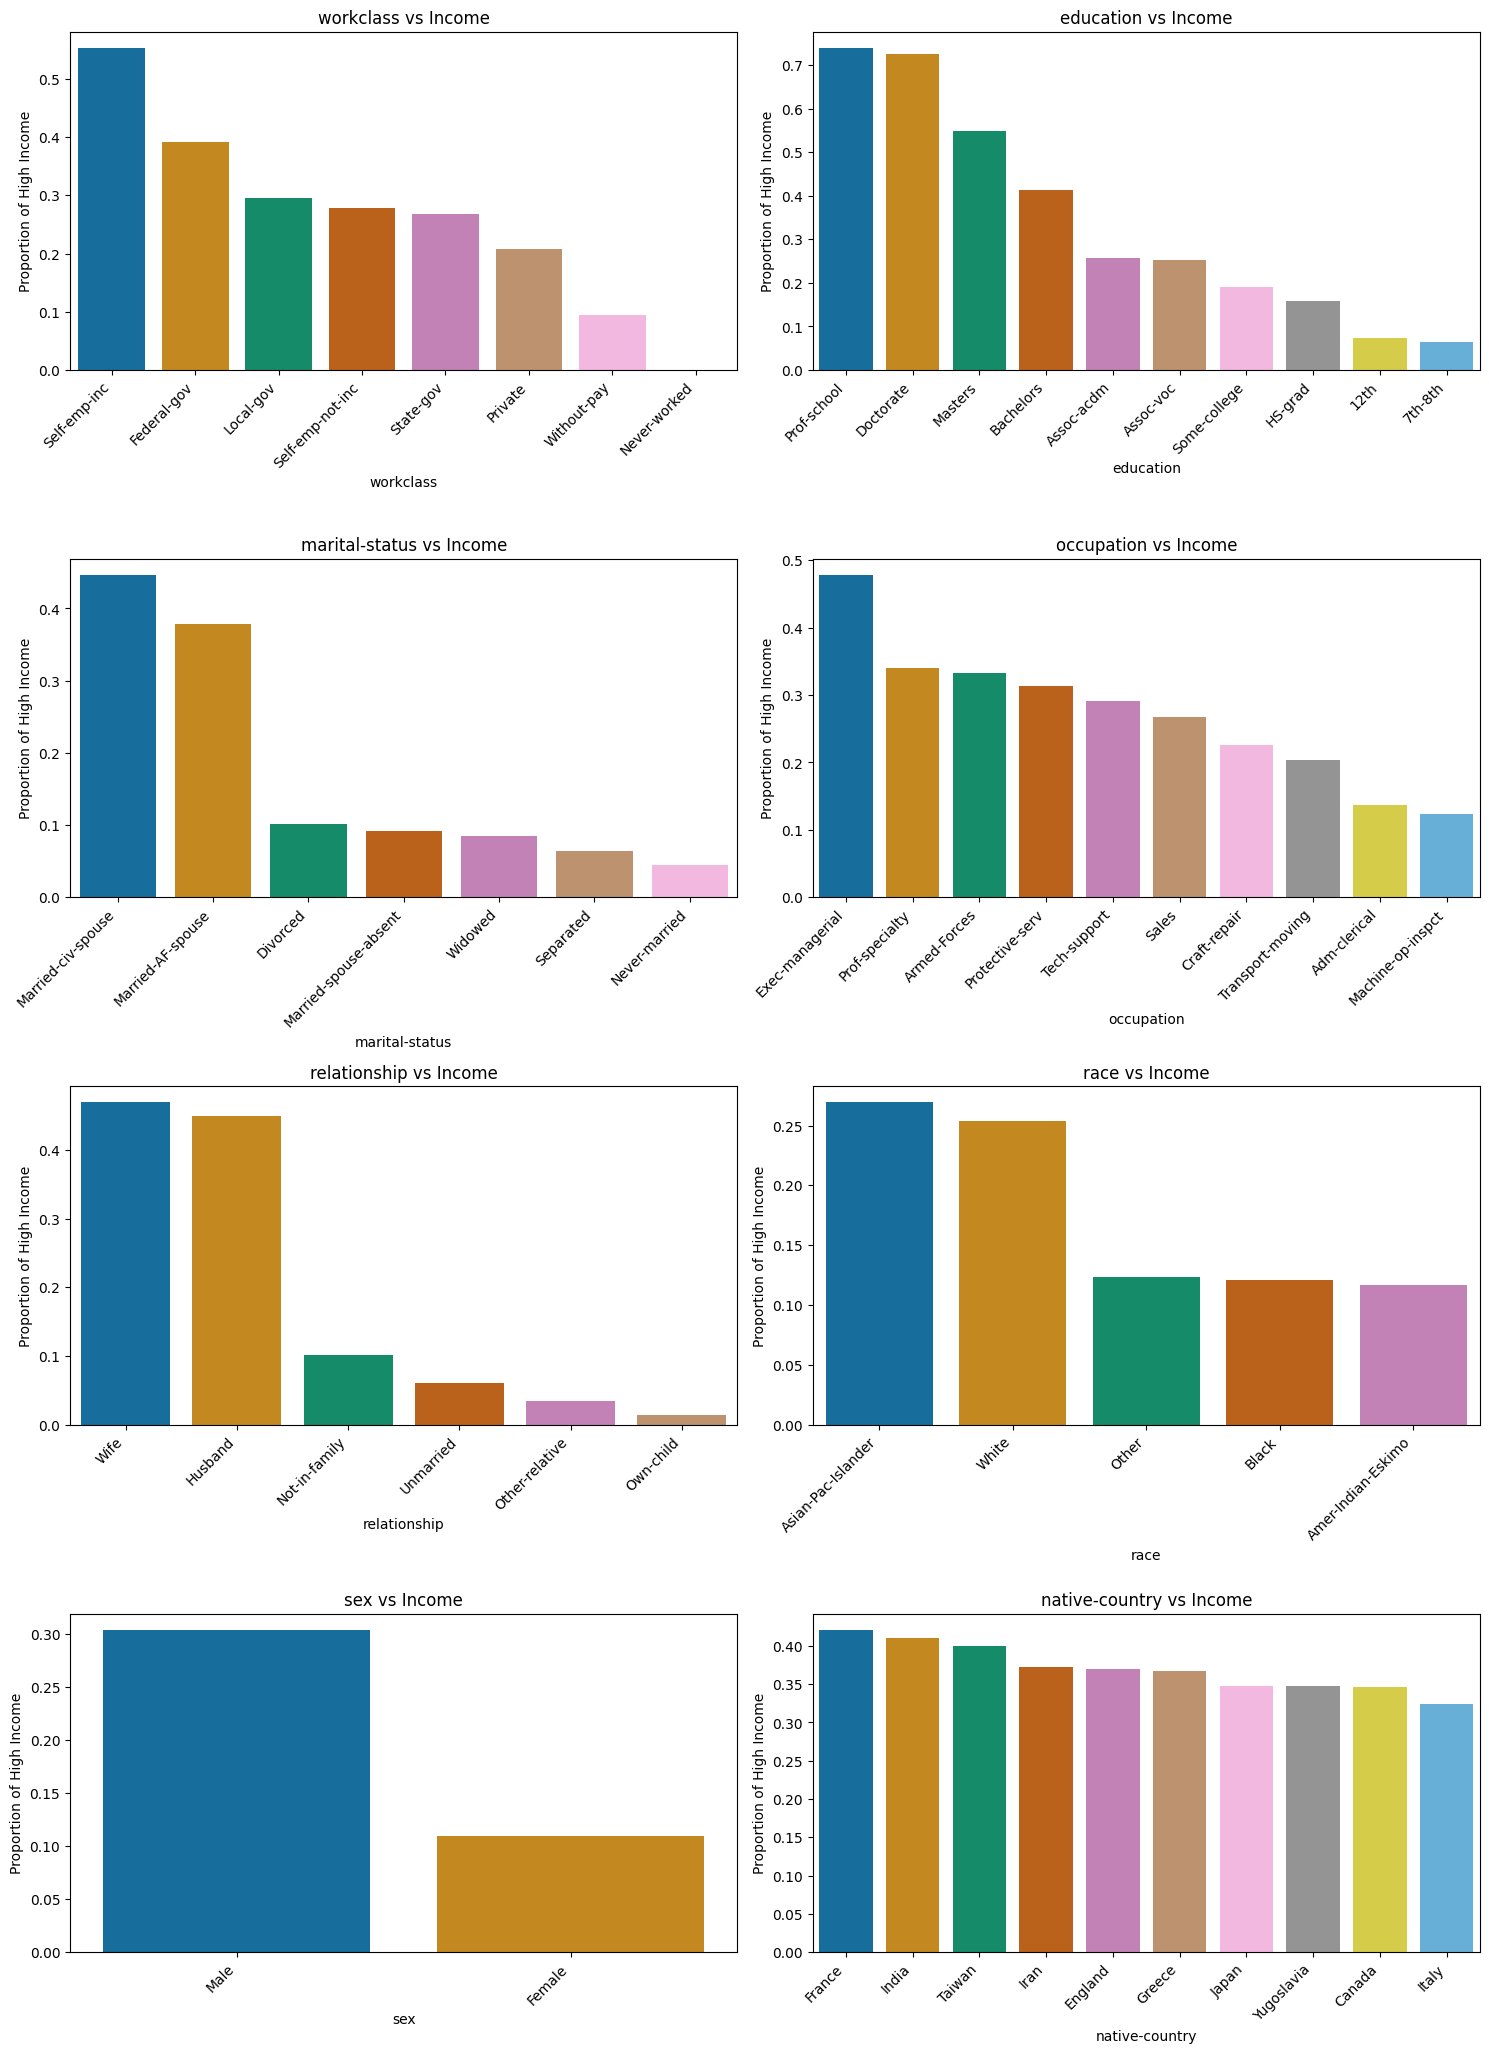

In [5]:
import math
from turtle import color

cat_cols = data.select_dtypes(include="object").columns
num_cols = data.select_dtypes(include=np.number).columns
n_cols = 2 
n_rows = math.ceil(len(cat_cols) / n_cols)

skip = ["income", "income_cleaned"]
#Dark Color Palette
color = sns.color_palette("colorblind")

plt.figure(figsize=(15, 5*n_rows))

for i, col in enumerate(cat_cols):
    
    if col in skip:
        continue
    
    plt.subplot(n_rows, n_cols, i+1)
    
    income_prop = pd.crosstab(data[col], data["income_cleaned"])
    income_prop['High Income'] = income_prop['>50K'] / (income_prop['>50K'] + income_prop['<=50K'])
    
    top_categories = income_prop.sort_values(by="High Income", ascending=False).head(10)
    
    sns.barplot(x=top_categories.index, y='High Income', data=top_categories.reset_index(), palette=color)
    
    plt.title(f"{col} vs Income")
    plt.ylabel("Proportion of High Income")
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
plt.show()  
    

In [63]:
print(type(data))
print(type(data[["age", "education-num", "hours-per-week"]]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
! pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 74.5 MB/s eta 0:00:00a 0:00:01


Split and Carry

In [109]:
import pandas as pd
import numpy as np
from gurobipy import Model, GRB, quicksum
import warnings
warnings.filterwarnings('ignore')

# Function to compute variances for each numeric column
def compute_variances(df, numeric_cols):
    variances = {}
    for col in numeric_cols:
        if col in df.columns:
            variances[col] = df[col].var()
    return variances

# Sort dataframe based on increasing variance
def sort_by_variance(df, variances):
    # Sort columns by variance (ascending)
    sorted_cols = sorted(variances.items(), key=lambda x: x[1])
    
    # For each column, sort the dataframe
    sorted_df = df.copy()
    for col, _ in sorted_cols:
        sorted_df = sorted_df.sort_values(by=col)
    
    return sorted_df

# Function to solve subproblem
def solve_subproblem(subproblem_df, k, numeric_cols):
    n = len(subproblem_df)
    if n < k:
        return subproblem_df, 0  # Not enough records to anonymize
    
    # Create ranges for numeric attributes
    anonymized_df = subproblem_df.copy()
    total_info_loss = 0
    
    # Group records into sets of size k
    for i in range(0, n, k):
        group = subproblem_df.iloc[i:min(i+k, n)]
        
        # For each numeric column, generalize to min-max range
        for col in numeric_cols:
            if col in group.columns:
                # Extract numeric values, handling both numeric and string range values
                numeric_values = []
                for val in group[col]:
                    if isinstance(val, (int, float)):
                        numeric_values.append(float(val))
                    elif isinstance(val, str) and val.startswith('[') and '-' in val and val.endswith(']'):
                        # Extract min and max from "[min-max]" format
                        try:
                            parts = val.strip('[]').split('-')
                            min_part = float(parts[0])
                            max_part = float(parts[1])
                            numeric_values.extend([min_part, max_part])
                        except (ValueError, IndexError):
                            continue
                
                if not numeric_values:
                    continue  # Skip if no valid numeric values found
                
                # Get min and max values
                min_val = min(numeric_values)
                max_val = max(numeric_values)
                range_str = f"[{min_val}-{max_val}]"
                
                # Calculate information loss for this column
                # Extract numeric values from the entire subproblem for this column
                all_numeric_values = []
                for val in subproblem_df[col]:
                    if isinstance(val, (int, float)):
                        all_numeric_values.append(float(val))
                    elif isinstance(val, str) and val.startswith('[') and '-' in val and val.endswith(']'):
                        try:
                            parts = val.strip('[]').split('-')
                            all_numeric_values.extend([float(parts[0]), float(parts[1])])
                        except (ValueError, IndexError):
                            continue
                
                if len(all_numeric_values) >= 2:  # Need at least 2 values to have a range
                    col_min = min(all_numeric_values)
                    col_max = max(all_numeric_values)
                    col_range = col_max - col_min
                    
                    if col_range > 0:  # Avoid division by zero
                        info_loss = (max_val - min_val) / col_range
                        total_info_loss += info_loss
                
                # Update values in the anonymized dataframe
                anonymized_df.loc[group.index, col] = range_str
    
    return anonymized_df, total_info_loss

# Helper function to handle string range values
def extract_numeric_values(series):
    numeric_values = []
    for val in series:
        if pd.isna(val):
            continue
        if isinstance(val, (int, float)):
            numeric_values.append(float(val))
        elif isinstance(val, str) and val.startswith('[') and '-' in val and val.endswith(']'):
            try:
                parts = val.strip('[]').split('-')
                numeric_values.extend([float(parts[0]), float(parts[1])])
            except (ValueError, IndexError):
                continue
    return numeric_values if numeric_values else [0]  # Default to [0] if empty

# Main Split & Carry algorithm
def split_and_carry(df, k, S, numeric_cols):
    # Make a copy of the input dataframe
    df_copy = df.copy()
    
    # First pass to handle existing numeric values
    for col in numeric_cols:
        if col in df_copy.columns:
            # Try to convert clean numeric values
            try:
                df_copy[col] = pd.to_numeric(df_copy[col], errors='ignore')
            except:
                pass  # If conversion fails, we'll handle it differently
    
    # Compute variances with custom handling for range strings
    variances = {}
    for col in numeric_cols:
        if col in df_copy.columns:
            # Extract all numeric values from the column
            values = extract_numeric_values(df_copy[col])
            if len(values) > 1:  # Need at least 2 values for variance
                variances[col] = np.var(values)
            else:
                variances[col] = 0
    
    # Sort data
    sorted_df = sort_by_variance(df_copy, variances)
    
    # Initialize
    carry_over = pd.DataFrame(columns=df_copy.columns)
    result_df = pd.DataFrame(columns=df_copy.columns)
    total_info_loss = 0
    
    # Process subproblems
    remaining_df = sorted_df.copy()
    while len(remaining_df) > 0:
        # Determine size of next subproblem
        subproblem_size = min(k * S, len(remaining_df))
        
        # Create subproblem
        next_records = remaining_df.iloc[:subproblem_size]
        if len(carry_over) > 0:
            subproblem = pd.concat([carry_over, next_records])
        else:
            subproblem = next_records.copy()
        
        # Update remaining records
        remaining_df = remaining_df.iloc[subproblem_size:]
        
        # Solve subproblem
        anonymized_subproblem, info_loss = solve_subproblem(subproblem, k, numeric_cols)
        total_info_loss += info_loss
        
        # Determine carry-over records (last k records and their equivalence class)
        if len(remaining_df) > 0 and len(anonymized_subproblem) >= k:
            last_k_records = anonymized_subproblem.iloc[-k:]
            # In a real implementation, we would determine the entire equivalence class
            # For simplicity, we'll just carry over the last k records
            carry_over = last_k_records.copy()
        else:
            carry_over = pd.DataFrame(columns=df_copy.columns)
        
        # Add non-carry-over records to result
        if len(anonymized_subproblem) > len(carry_over):
            if len(carry_over) > 0:
                non_carry_records = anonymized_subproblem.iloc[:-len(carry_over)]
            else:
                non_carry_records = anonymized_subproblem
            
            if len(result_df) > 0:
                result_df = pd.concat([result_df, non_carry_records])
            else:
                result_df = non_carry_records.copy()
    
    return result_df, total_info_loss

def preprocess_existing_df(df):
    df_copy = df.copy()
    columns_to_remove = ['fnlwgt', 'capital-gain', 'capital-loss']
    for col in columns_to_remove:
        if col in df_copy.columns:
            df_copy = df_copy.drop(columns=[col])
    return df_copy

# Define parameters for k-anonymity
k = 5 
S = 10

def run_anonymization(df):
    # Preprocess
    df_processed = preprocess_existing_df(df)
    
    # Automatically detect numeric columns
    numeric_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
    print(f"Detected numeric columns: {numeric_cols}")
    
    # Run the algorithm
    anonymized_df, info_loss = split_and_carry(df_processed, k, S, numeric_cols)
    
    print("Original Data (Sample):")
    print(df_processed.head())
    print("\nAnonymized Data (Sample):")
    print(anonymized_df.head())
    print(f"\nTotal Information Loss: {info_loss}")
    
    return anonymized_df, info_loss

# Use the function with your data
anonymized_data, info_loss = run_anonymization(data)

Detected numeric columns: ['age', 'education-num', 'hours-per-week', 'capital_ratio']
Original Data (Sample):
   age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  hours-per-week  \
0       Adm-clerical  Not-in-family  White    Male              40   
1    Exec-managerial        Husband  White    Male              13   
2  Handlers-cleaners  Not-in-family  White    Male              40   
3  Handlers-cleaners        Husband  Black    Male              40   
4     Prof-specialty           Wife  Black  Female              40   

  native-country income 

In [77]:
anonymized_data.to_csv('anonymized_adult.csv', index=False)
data['capital_ratio'] = data['capital-gain'] / (data['capital-loss']+1)
df_x = data.drop(columns=["income", "income_cleaned", "capital-gain", "capital-loss", "fnlwgt", "sex", "race", "native-country"])
df_y = data["income_cleaned"]


In [97]:
display(HTML("<h3 >Preview</h3>"))
display(anonymized_data.head())

# Read CSV file
anonymized_data = pd.read_csv('anonymized_adult.csv')
anonymized_data['capital_ratio'] = data['capital-gain'] / (data['capital-loss']+1)
df_x = anonymized_data.drop(columns=["income", "income_cleaned", "sex", "race", "native-country"])
df_y = anonymized_data["income_cleaned"]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,income_cleaned,capital_ratio
0,[17.0-17.0],Private,10th,[6.0-8.0],Never-married,Other-service,Own-child,White,Female,[20.0-40.0],United-States,<=50K.,<=50K,2174.0
1,[17.0-17.0],Private,12th,[6.0-8.0],Never-married,Handlers-cleaners,Own-child,White,Male,[20.0-40.0],United-States,<=50K.,<=50K,0.0
2,[17.0-17.0],Private,10th,[6.0-8.0],Never-married,Prof-specialty,Own-child,White,Male,[20.0-40.0],United-States,<=50K,<=50K,0.0
3,[17.0-17.0],Private,11th,[6.0-8.0],Never-married,Handlers-cleaners,Own-child,White,Male,[20.0-40.0],United-States,<=50K.,<=50K,0.0
4,[17.0-17.0],Never-worked,11th,[6.0-8.0],Never-married,Prof-specialty,Own-child,Black,Female,[20.0-40.0],United-States,<=50K.,<=50K,0.0


In [99]:
df_x.shape, df_y.shape

print(df_x["age"].value_counts())

age
[36.0-36.0]    1340
[35.0-35.0]    1335
[33.0-33.0]    1330
[23.0-23.0]    1325
[31.0-31.0]    1320
               ... 
[83.0-83.0]       5
[85.0-85.0]       5
[86.0-88.0]       5
[88.0-88.0]       5
[89.0-90.0]       5
Name: count, Length: 129, dtype: int64


In [68]:
# Grouping age
data['age_group'] = pd.cut(data['age'], 
                           bins=[0, 18, 25, 35, 45, 55, 65, 100], 
                           labels=['Under 18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']).astype(object)
# Calculating capital ratio
data['capital_ratio'] = data['capital-gain'] / (data['capital-loss']+1)

# data['work_hours_group'] = pd.cut(
#     data['hours-per-week'], 
#     bins=[0, 20, 35, 40, 45, 60, 100], 
#     labels=['Part-time low', 'Part-time high', 'Standard full-time', 'Moderate overtime', 'High overtime', 'Very high hours']
# ).astype(object)

df_x = data.drop(columns=["income", "income_cleaned", "age", "capital-gain", "capital-loss", "fnlwgt", "sex", "race", "native-country"])
df_y = data["income_cleaned"]
df_x.shape, df_y.shape

((48842, 9), (48842,))

In [30]:
! pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 51.2 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 79.2 MB/s eta 0:00:00a 0:00:01


In [100]:

from operator import le
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

seed = 42

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=seed)

cate = x_train.select_dtypes(include="object").columns
print(cate)


for col in cate:
    all_values = pd.concat([x_train[col], x_test[col]]).unique()
    le = preprocessing.LabelEncoder()
    le.fit(all_values)

    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])


y_train_encoded = (y_train == '>50K').astype(int)
y_test_encoded = (y_test == '>50K').astype(int)


Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'hours-per-week'],
      dtype='object')


In [101]:
print(x_train.head())
print(type(x_train))
x_train.shape, x_test.shape, y_train.shape, y_test.shape

       age  workclass  education  education-num  marital-status  occupation  \
37193   56          3         11             99               2           9   
31093   48          4         11             32               2          11   
33814   51          3         11             91               2           6   
14500   21          6         12             12               2           9   
23399   34          3         12             82               2           3   

       relationship  hours-per-week  capital_ratio  
37193             0             302            0.0  
31093             0             245            0.0  
33814             0             627            0.0  
14500             5             612            0.0  
23399             0             622            0.0  
<class 'pandas.core.frame.DataFrame'>


((39073, 9), (9769, 9), (39073,), (9769,))

In [102]:
print(x_train["age"].value_counts())

age
32     1096
34     1072
24     1060
28     1059
10     1042
       ... 
126       2
125       2
20        2
104       2
39        2
Name: count, Length: 129, dtype: int64


In [103]:
scalar = preprocessing.StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

print(x_train.shape, x_test.shape)
print(type(x_train), type(x_test))

print(x_train[:5])

(39073, 9) (9769, 9)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[ 0.67729379 -0.08557188  0.18293559  0.84937081 -0.41212016  0.71526205
  -0.90332037 -0.72732899 -0.1455235 ]
 [ 0.36083838  0.81638388  0.18293559 -1.57419407 -0.41212016  1.21892378
  -0.90332037 -1.01107253 -0.1455235 ]
 [ 0.47950916 -0.08557188  0.18293559  0.55998992 -0.41212016 -0.04023055
  -0.90332037  0.89050693 -0.1455235 ]
 [-0.70719863  2.6202954   0.44154059 -2.29764628 -0.41212016  0.71526205
   2.21470617  0.81583758 -0.1455235 ]
 [-0.19295859 -0.08557188  0.44154059  0.23443643 -0.41212016 -0.79572315
  -0.90332037  0.86561715 -0.1455235 ]]


In [104]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

importance = pd.DataFrame({
    'feature': df_x.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(importance)

          feature  importance
0             age    0.199352
7  hours-per-week    0.184250
3   education-num    0.128853
6    relationship    0.116460
2       education    0.112223
5      occupation    0.096248
4  marital-status    0.087894
1       workclass    0.051243
8   capital_ratio    0.023476


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score

log_reg = LogisticRegression(random_state=seed)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

print(f"Report: {classification_report(y_test, y_pred)}")

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

Report:               precision    recall  f1-score   support

       <=50K       0.77      0.96      0.85      7402
        >50K       0.39      0.08      0.13      2367

    accuracy                           0.75      9769
   macro avg       0.58      0.52      0.49      9769
weighted avg       0.67      0.75      0.68      9769

Accuracy: 0.7467499232265329
Precision: 0.674368900244197
Recall: 0.7467499232265329
F1 Score: 0.6774735377623982


In [112]:
import pickle
from sklearn.ensemble import RandomForestClassifier

with open('RandomForeast.pkl', 'wb') as file:
    pickle.dump(model, file)
    random_forest = RandomForestClassifier(
        random_state=seed,
        n_estimators=100,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        )
    random_forest.fit(x_train, y_train)
    y_train_pred = random_forest.predict(x_train)
    train_error_rate = 1 - accuracy_score(y_train, y_train_pred)
    print(f"Train Error Rate: {train_error_rate}")
    y_pred = random_forest.predict(x_test)

print(f"Report: {classification_report(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

Train Error Rate: 0.11409413149745351
Report:               precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      7402
        >50K       0.69      0.57      0.62      2367

    accuracy                           0.83      9769
   macro avg       0.78      0.74      0.76      9769
weighted avg       0.83      0.83      0.83      9769

Accuracy: 0.8342716757088751
Precision: 0.8264854081905681
Recall: 0.8342716757088751
F1 Score: 0.8282841935643934


In [14]:
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import shuffle
from sklearn.metrics import log_loss, accuracy_score, classification_report, f1_score

batch = 1000
num_batches = int(x_train.shape[0] / batch)

epoch_train_losses = []
epoch_test_losses = []

gradient_boosting = GradientBoostingClassifier(
    random_state=seed,
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    min_samples_split=5
)
    
for epoch in range(3):
    X_shuffled, y_shuffled = shuffle(x_train, y_train_encoded, random_state=seed+epoch)
    
    epoch_batch_losses = []
    
    for i in range(num_batches):
        start_index = i * batch
        end_index = min((i+1) * batch, x_train.shape[0])
        
        x_batch = X_shuffled[start_index:end_index]
        y_batch = y_shuffled[start_index:end_index]
        
        gradient_boosting.fit(x_batch, y_batch)
        
        y_batch_proba = gradient_boosting.predict_proba(x_batch)
        batch_loss = log_loss(y_batch, y_batch_proba)
        epoch_batch_losses.append(batch_loss)
        
        if i % 10 == 0:
           print(f"  Epoch {epoch+1}, Batch {i+1}/{num_batches}, Log Loss: {batch_loss:.4f}")

    y_train_pred = gradient_boosting.predict(x_train)
    train_error_rate = 1 - accuracy_score(y_train_encoded, y_train_pred)
    epoch_train_losses.append(train_error_rate)

    y_test_pred = gradient_boosting.predict(x_test)
    test_error_rate = 1 - accuracy_score(y_test_encoded, y_test_pred)   
    epoch_test_losses.append(test_error_rate)
    
    print(f"Epoch {epoch+1} completed:")
    print("---")

            
print(f"Report: {classification_report(y_test_encoded, y_test_pred)}")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test_encoded, y_test_pred, average='weighted')}")

with open('GradientBoosting.pkl', 'wb') as file:
    pickle.dump(gradient_boosting, file)
    print("Model saved as 'GradientBoosting.pkl'")

  Epoch 1, Batch 1/39, Log Loss: 0.1369


  Epoch 1, Batch 11/39, Log Loss: 0.1398
  Epoch 1, Batch 21/39, Log Loss: 0.1346
  Epoch 1, Batch 31/39, Log Loss: 0.1267
Epoch 1 completed:
---
  Epoch 2, Batch 1/39, Log Loss: 0.1213
  Epoch 2, Batch 11/39, Log Loss: 0.1408
  Epoch 2, Batch 21/39, Log Loss: 0.1282
  Epoch 2, Batch 31/39, Log Loss: 0.1309
Epoch 2 completed:
---
  Epoch 3, Batch 1/39, Log Loss: 0.1184
  Epoch 3, Batch 11/39, Log Loss: 0.1421
  Epoch 3, Batch 21/39, Log Loss: 0.1242
  Epoch 3, Batch 31/39, Log Loss: 0.1242
Epoch 3 completed:
---
Report:               precision    recall  f1-score   support

           0       0.88      0.91      0.90      7414
           1       0.69      0.60      0.64      2355

    accuracy                           0.84      9769
   macro avg       0.78      0.76      0.77      9769
weighted avg       0.83      0.84      0.84      9769

Accuracy: 0.8391851776026206
F1 Score: 0.8354378144867738
Model saved as 'GradientBoosting.pkl'


In [ ]:
import pickle
import xgboost as xgb
from sklearn.utils import shuffle
from sklearn.metrics import log_loss, accuracy_score, classification_report, f1_score

batch = 1000
num_batches = int(x_train.shape[0] / batch)

epoch_train_losses = []
epoch_test_losses = []

# 初始化XGBoost模型
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=seed
)
    
for epoch in range(3):
    X_shuffled, y_shuffled = shuffle(x_train, y_train_encoded, random_state=seed+epoch)
    
    epoch_batch_losses = []
    
    for i in range(num_batches):
        start_index = i * batch
        end_index = min((i+1) * batch, x_train.shape[0])
        
        x_batch = X_shuffled[start_index:end_index]
        y_batch = y_shuffled[start_index:end_index]
        
        xgb_model.fit(
            x_batch, y_batch, 
            verbose=False,
            xgb_model=None if epoch == 0 and i == 0 else xgb_model.get_booster()
        )
        
        y_batch_proba = xgb_model.predict_proba(x_batch)
        batch_loss = log_loss(y_batch, y_batch_proba)
        epoch_batch_losses.append(batch_loss)
        
        if i % 10 == 0:
           print(f"  Epoch {epoch+1}, Batch {i+1}/{num_batches}, Log Loss: {batch_loss:.4f}")

    y_train_pred = xgb_model.predict(x_train)
    train_error_rate = 1 - accuracy_score(y_train_encoded, y_train_pred)
    epoch_train_losses.append(train_error_rate)

    y_test_pred = xgb_model.predict(x_test)
    test_error_rate = 1 - accuracy_score(y_test_encoded, y_test_pred)   
    epoch_test_losses.append(test_error_rate)
    
    print(f"Epoch {epoch+1} completed:")
    print(f"  Train Error Rate: {train_error_rate:.4f}")
    print(f"  Test Error Rate: {test_error_rate:.4f}")
    print("---")

# 顯示錯誤率變化
print("Error Rate Changes Across Epochs:")
for epoch, (train_err, test_err) in enumerate(zip(epoch_train_losses, epoch_test_losses)):
    print(f"Epoch {epoch+1}: Train Error = {train_err:.4f}, Test Error = {test_err:.4f}")

# 最終評估
print(f"Report:\n{classification_report(y_test_encoded, y_test_pred)}")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test_encoded, y_test_pred, average='weighted'):.4f}")

# 保存模型
with open('XGBoost.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
    print("Model saved as 'XGBoost.pkl'")

  Epoch 1, Batch 1/39, Log Loss: 0.2168


In [113]:
from sklearn.svm import SVC

svc = SVC(random_state=seed)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

print(f"Report: {classification_report(y_test, y_pred)}")  
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

Report:               precision    recall  f1-score   support

       <=50K       0.85      0.89      0.87      7402
        >50K       0.61      0.52      0.56      2367

    accuracy                           0.80      9769
   macro avg       0.73      0.70      0.72      9769
weighted avg       0.79      0.80      0.80      9769

Accuracy: 0.8015149964172382
Precision: 0.7927571802321604
Recall: 0.8015149964172382
F1 Score: 0.7959381082579882


In [48]:
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 55.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 19.0 MB/s eta 0:00:0000:0100:01


In [ ]:
from xgboost import XGBClassifier
import pickle

with open("xgb_model.pkl", "wb") as f:
    xgb = XGBClassifier(
        random_state=seed,
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,)
    
    pickle.dump(xgb, f)
    xgb.fit(x_train, y_train_encoded)
    y_train_pred = xgb.predict(x_train)
    train_error_rate = 1 - accuracy_score(y_train_encoded, y_train_pred)
    print(f"Training Error Rate: {train_error_rate}")
    y_pred = xgb.predict(x_test)

print(f"Report: {classification_report(y_test_encoded, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred)}")
print(f"Precision: {precision_score(y_test_encoded, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test_encoded, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test_encoded, y_pred, average='weighted')}")

Training Error Rate: 0.14639264965577248
Report:               precision    recall  f1-score   support

           0       0.87      0.92      0.89      7402
           1       0.69      0.58      0.63      2367

    accuracy                           0.83      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.83      0.83      9769

Accuracy: 0.8349882280683796
F1 Score: 0.8299439098764072


/home/tommy/miniconda3/envs/dataPrivacy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Figure size 1200x800 with 0 Axes>

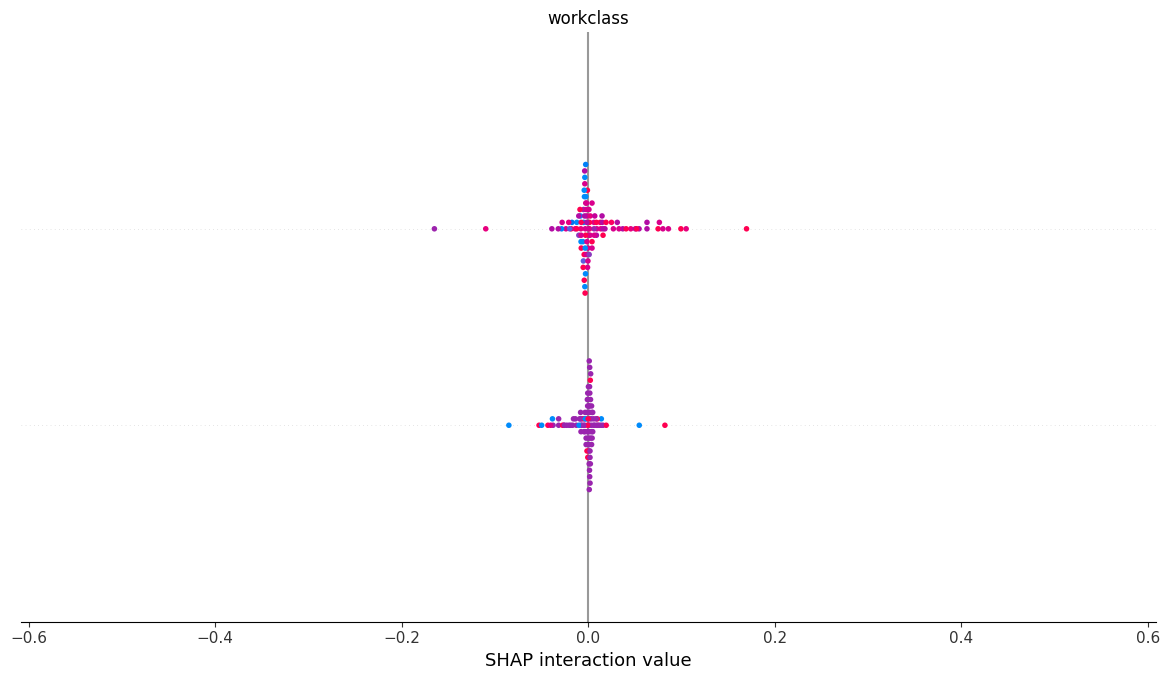

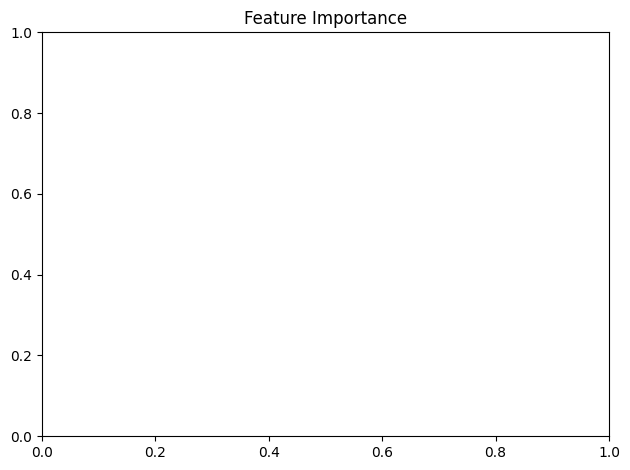

In [ ]:
import shap
import pickle


with open("RandomForeast.pkl", "rb") as f:
    rf = pickle.load(f)
    
    explainer = shap.TreeExplainer(rf)
    
    sample_size = 100
    sample_indices = np.random.choice(len(x_test), sample_size, replace=False)
    x_test_sample = x_test[sample_indices]
    shap_values = explainer(x_test_sample)
    
    if isinstance(shap_values, list):
        shap_values = shap_values[0]

    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, x_test_sample, plot_type='bar', feature_names=df_x.columns)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
